In [ ]:
# 2-dimensional data set
# knn: train different metrics
# knn: examine results of changes in metrics

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
# m a ke  b l o b s
def create_data_sets():
    # 2-dimensional, 3 classes, uneven, overlapping
    # n features = n dimensions
    class_1 = sklearn.datasets.make_blobs(n_samples = 1000, centers = 1, n_features = 2, cluster_std = 0.85, random_state = 0)
    class_2 = sklearn.datasets.make_blobs(n_samples = 1000, centers = 2, n_features = 2, cluster_std = 0.65, random_state = 0)
    class_3 = sklearn.datasets.make_blobs(n_samples = 1000, centers = 4, n_features = 2, cluster_std = 0.75, random_state = 0)
    
    return class_1, class_2, class_3
    

In [3]:
# needs to return X, y -> data, labels

def create_labeled_data():
    datasets = create_data_sets()
    x = np.array(datasets[0][0])
    y = np.array(datasets[1][0])
    z = np.array(datasets[2][0])
    plt.figure(1)
    plt.scatter(x[:, 0], x[:, 1], c = 'red')
    plt.scatter(y[:, 0], y[:, 1], c = 'blue')
    plt.scatter(z[:, 0], z[:, 1], c = 'orange')
    plt.show()


    X = np.concatenate([x, y, z], axis = 0)
    class_labels = [np.full(clss.shape[0], class_index) for class_index, clss in enumerate([x, y, z])]
    class_labels = np.concatenate(class_labels, axis=0)

    return X, class_labels

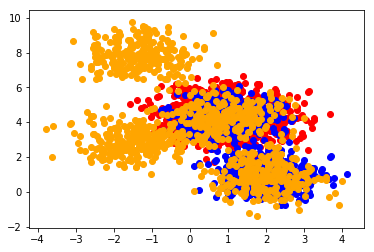

[[-0.47405958  5.96194641]
 [ 1.80819737  6.20854655]
 [-0.37646062  4.30652621]
 ...
 [-1.16370232  8.32841078]
 [-1.2340642   7.7739344 ]
 [ 3.44246096  0.73703867]]



[0 0 0 ... 2 2 2]


In [4]:
X, c = create_labeled_data()
print(X)
print("\n\n")
print(c)

In [5]:
def make_plot(X, y, knn):
    mesh_step_size = .005
    plt.figure(figsize=(27, 9))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))

    
    knn.fit(X, y)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y,
                   edgecolors='k', alpha=.05)

#     plt.set_xlim(xx.min(), xx.max())
#     plt.set_ylim(yy.min(), yy.max())
#     plt.set_xticks(())
#     plt.set_yticks(())

    plt.tight_layout()
    plt.show()
    

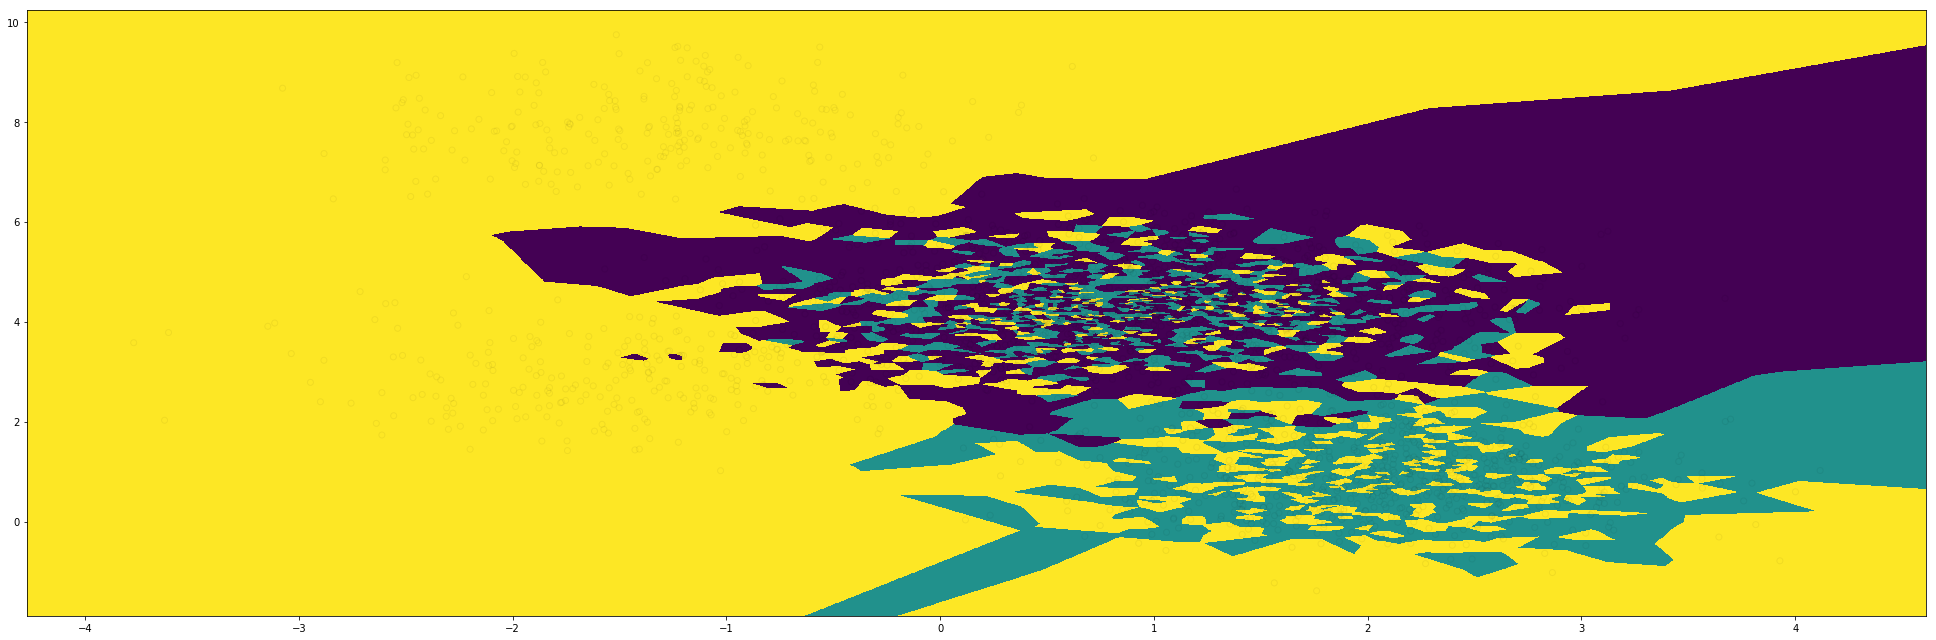

In [6]:
knn = knn = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
make_plot(X, c, knn)

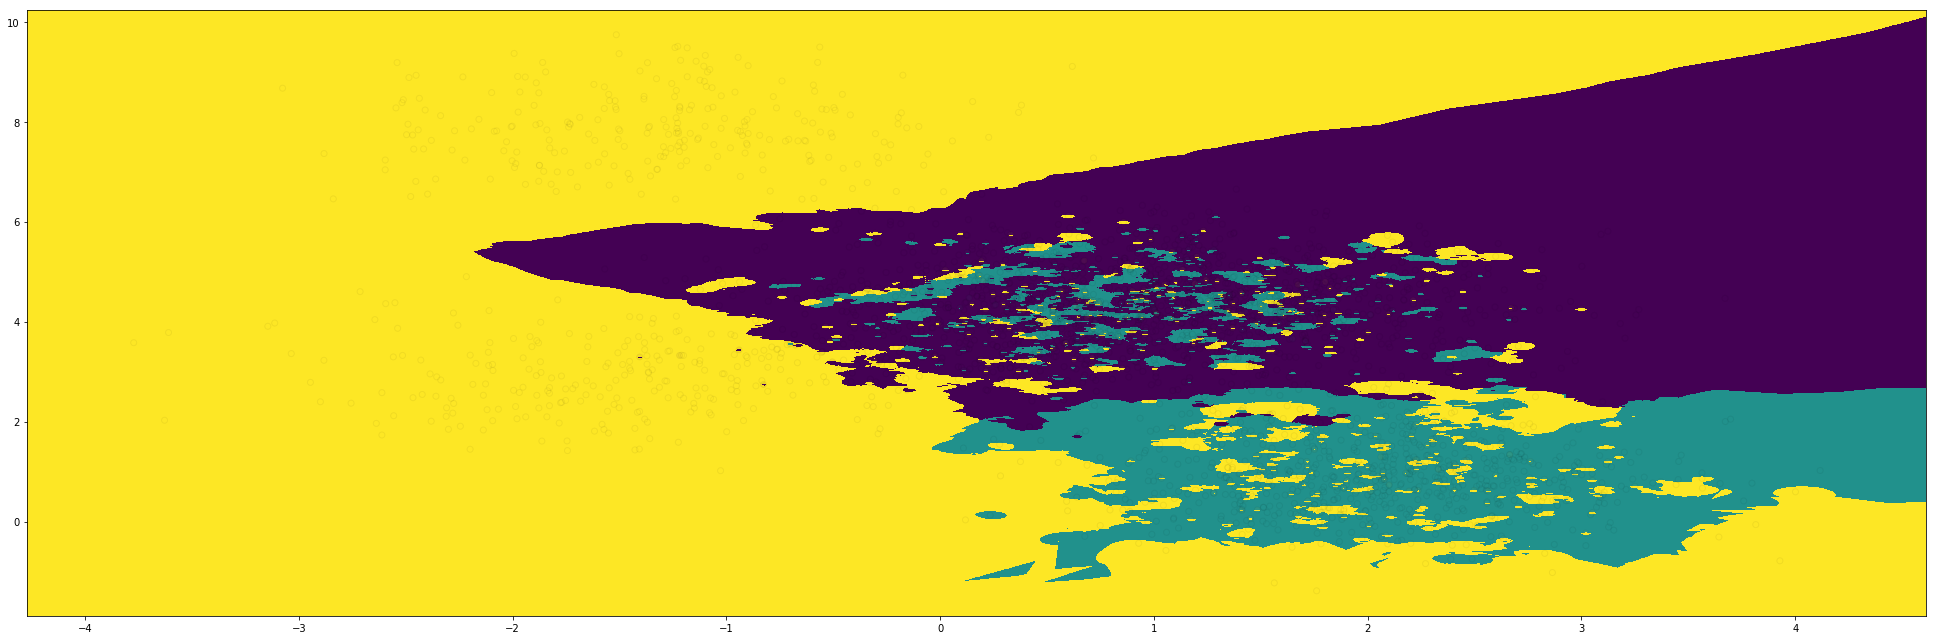

In [7]:
knn = knn = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean', weights = 'distance')
make_plot(X, c, knn)

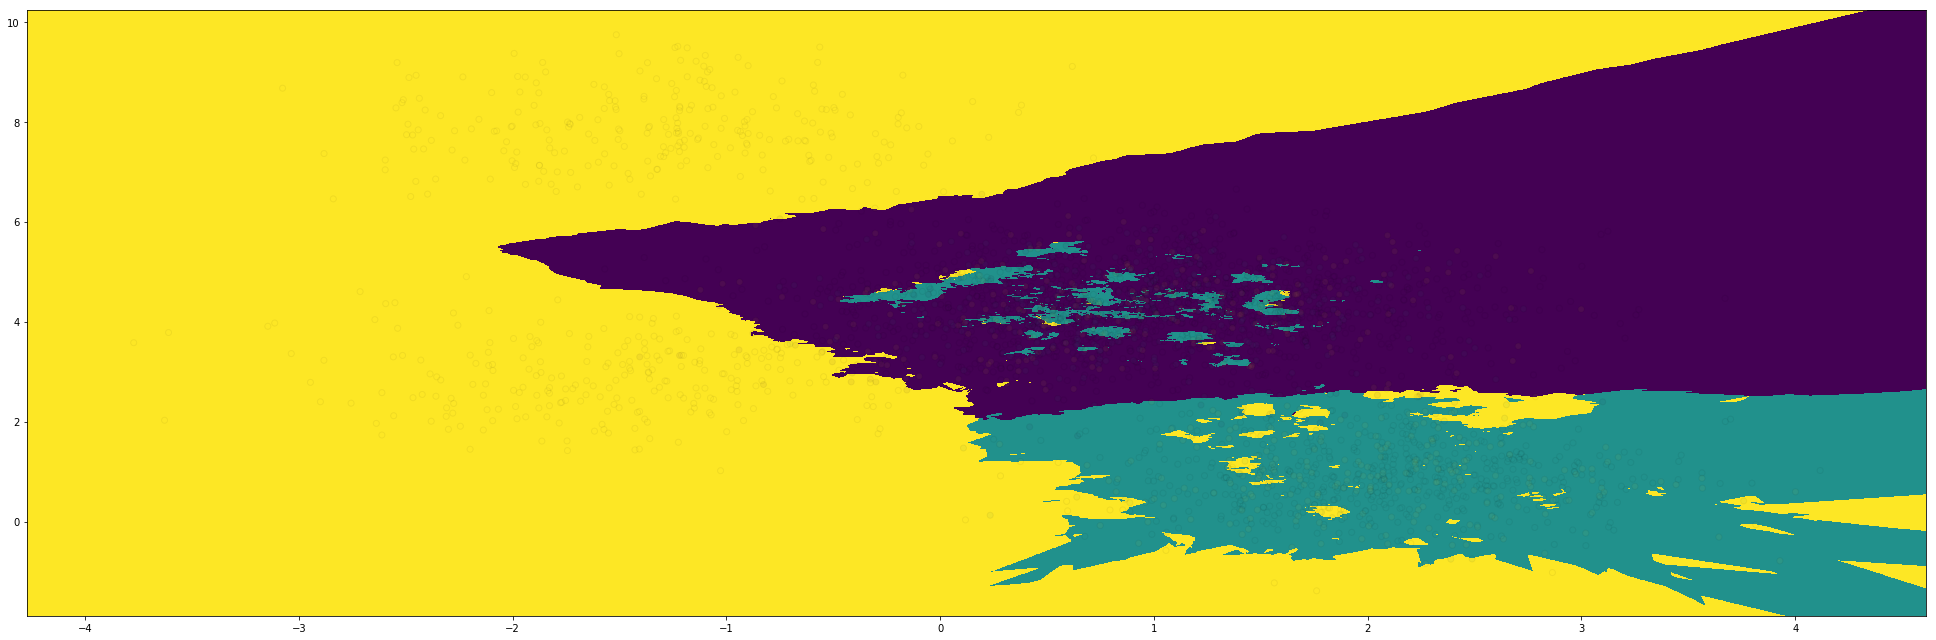

In [8]:
knn = KNeighborsClassifier(n_neighbors = 13, metric = 'euclidean')
make_plot(X, c, knn)

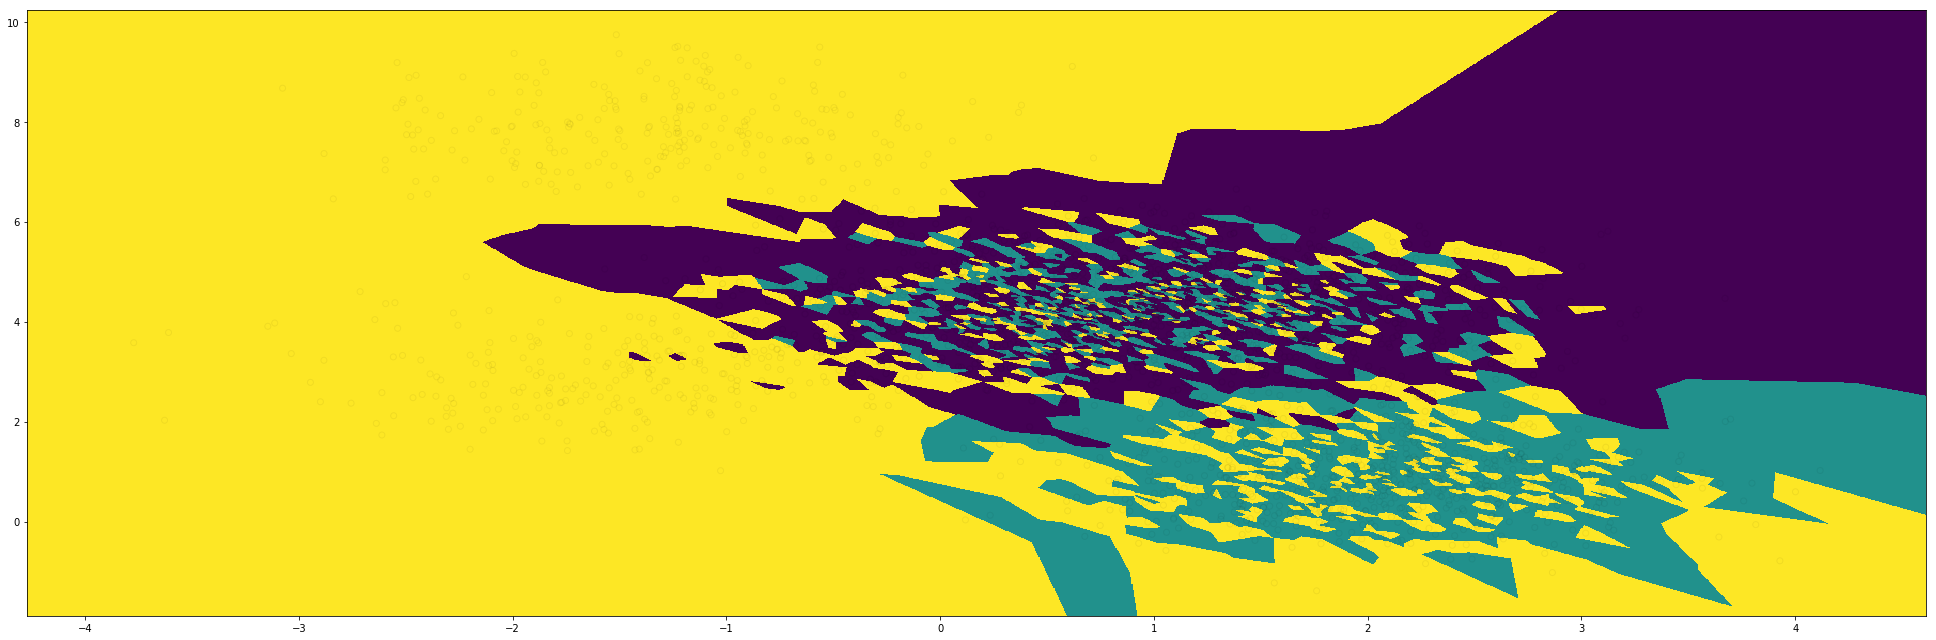

In [9]:
knn = KNeighborsClassifier(n_neighbors=1, metric='mahalanobis', metric_params={'V': np.cov(X.T)})
make_plot(X, c, knn)

In [40]:
def evaluate_best_metric_and_vote(X, c):
    best_k = -1
    best_mean_score = -1
    for k in range(1, 21):
        scores = []
        X_train, X_test, y_train, y_test = train_test_split(X, c, test_size=.2)
        knn = KNeighborsClassifier(n_neighbors = k, metric='mahalanobis', metric_params={'V': np.cov(X.T)})
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        scores.append(score)
        for i in range(1, 11):
            X_train, X_test, y_train, y_test = train_test_split(X, c)
            knn.fit(X_train, y_train)
            score = knn.score(X_test, y_test)
            scores.append(score)
        mean_score = np.mean(scores)
        if mean_score > best_mean_score:
            best_k = k
            best_mean_score = mean_score
            
    print("Best k = " + str(best_k))
    print("Best Score = " + str(best_mean_score))
    return best_k

In [44]:
def evaluate_worst_metric_and_vote(X, c):
    best_k = -1
    best_mean_score = -1
    for k in range(1, 21):
        scores = []
        X_train, X_test, y_train, y_test = train_test_split(X, c, test_size=.2)
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', weights = 'distance')
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        scores.append(score)
        for i in range(1, 11):
            X_train, X_test, y_train, y_test = train_test_split(X, c)
            knn.fit(X_train, y_train)
            score = knn.score(X_test, y_test)
            scores.append(score)
        mean_score = np.mean(scores)
        if mean_score > best_mean_score:
            best_k = k
            best_mean_score = mean_score
            
    print("Best k = " + str(best_k))
    print("Best Score = " + str(best_mean_score))
    return best_k

best: mahalanobis
worst: euclidean, distance

In [42]:
evaluate_best_metric_and_vote(X, c)

Best k = 18
Best Score = 0.634030303030303


18

In [43]:
evaluate_worst_metric_and_vote(X, c)

Best k = 19
Best Score = 0.6169090909090909


19

In [62]:
def get_mean_score_best_metric_and_vote(X, c):
    k = evaluate_best_metric_and_vote(X, c)
    scores = []
    for i in range(1, 21):
        X_train, X_test, y_train, y_test = train_test_split(X, c)
        knn = KNeighborsClassifier(n_neighbors = k, metric='mahalanobis', metric_params={'V': np.cov(X.T)})
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        scores.append(score)
    
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print("Mean = " + str(mean_score) + ", Std = " + str(std_score))

In [63]:
def get_mean_score_worst_metric_and_vote(X, c):
    k = evaluate_best_metric_and_vote(X, c)
    scores = []
    for i in range(1, 21):
        X_train, X_test, y_train, y_test = train_test_split(X, c)
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', weights = 'distance')
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        scores.append(score)
    
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print("Mean = " + str(mean_score) + ", Std = " + str(std_score))

In [ ]:
get_mean_score_best_metric_and_vote(X, c)

In [ ]:
get_mean_score_worst_metric_and_vote(X, c)